In [23]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv',
    names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
# Cell 3: Preprocessing
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
# Cell 4: Train models
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [27]:
# Cell 5: Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Logistic Regression Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Random Forest Accuracy: 0.7207792207792207
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



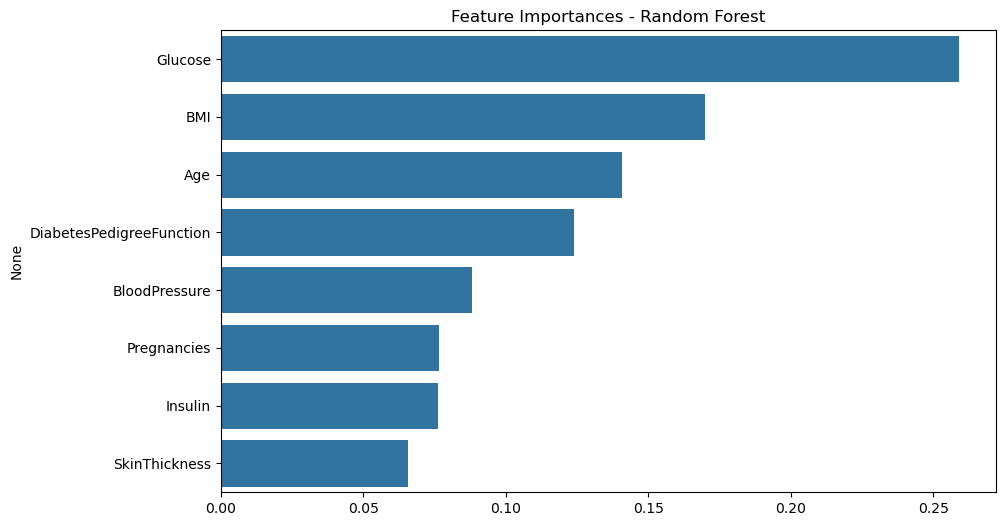

In [28]:
# Cell 6: Feature Importance
importances = rf_model.feature_importances_
features = df.columns[:-1]
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importances - Random Forest")
plt.show()


In [29]:
# Cell 7: Save Models
joblib.dump(log_model, 'logistic_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [34]:
# Cell 8: Predict New Sample
sample = np.array([[2, 120, 70, 20, 79, 25.6, 0.312, 28]])
sample_scaled = scaler.transform(sample)

print("Logistic:", "Diabetic" if log_model.predict(sample_scaled)[0] else "Non-Diabetic")
print("Random Forest:", "Diabetic" if rf_model.predict(sample_scaled)[0] else "Non-Diabetic")


Logistic: Non-Diabetic
Random Forest: Non-Diabetic


In [35]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [ ]:
code = """
import streamlit as st
import numpy as np
import joblib

# Load the model and scaler
model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')

st.title("🧬 Diabetes Prediction App")

# Input fields
inputs = [st.number_input(x, 0.0) for x in [
    "Pregnancies", "Glucose", "Blood Pressure", "Skin Thickness",
    "Insulin", "BMI", "Diabetes Pedigree Function", "Age"
]]

# Prediction logic
if st.button("Predict"):
    data = np.array([inputs])
    data_scaled = scaler.transform(data)
    pred = model.predict(data_scaled)[0]
    st.success("Prediction: " + ("Diabetic" if pred == 1 else "Non-Diabetic"))
"""


with open("diabetes_app.py", "w", encoding="utf-8") as f:
    f.write(code)
